# EDA

In [3]:
import os
import csv
import torch
import numpy as np
import pandas as pd
import glob
from PIL import Image
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# 데이터 로드

In [25]:
class MaskDatset(Dataset):
    def __init__(self, path, transform=None):
        super().__init__()
        self.csv_path = os.path.join(path, "train.csv")
        self.img_path = os.path.join(path, "images")
        self.data = pd.read_csv(self.csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img_file_path = glob.glob(self.img_path + '/' + self.data['path'][index] + '/*')
        img = [Image.open(img_file_path[i]) for i in range(0,7)]

        if self.transform:
            img_list = []
            for e in img:
                aug_img = self.transform(image=np.array(e))['image']
                img_list.append(aug_img)
            img = img_list
            #print(img)
        return img
    
def mask_plot(mask_data):
    fig, axes = plt.subplots(1,7, sharex=True, sharey=True, figsize=(12,6))
    #print(mask_data)
    for i in range(0, 7):
        axes[i].imshow(mask_data[i])
    plt.show()

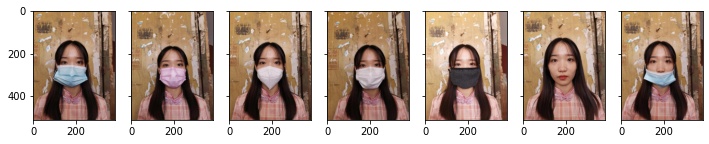

In [26]:
mask = MaskDatset('./input/data/train')
mask_plot(mask[500])

## Albumentaions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


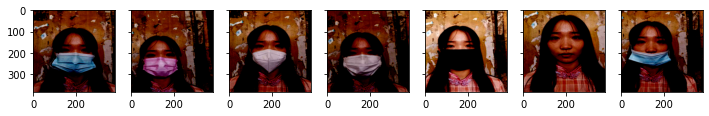

In [27]:
import albumentations as A

A_transform = A.Compose([
    A.ColorJitter()
    A.Resize(512,512),
    A.RandomCrop(384,384),
    A.Normalize(mean=[0.5, 0.5, 0.5],#[0.485, 0.456, 0.406],
                std=[0.5,0.5,0.5]),#[0.229, 0.224, 0.225]),
])
masks = MaskDatset('./input/data/train', transform=A_transform)
mask_plot(masks[500])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


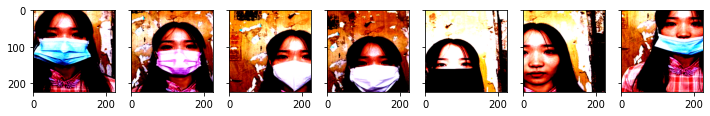

In [28]:
A_transform = A.Compose([
    A.Resize(384,384),
    A.RandomCrop(224,224),
    A.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
])
masks = MaskDatset('./input/data/train', transform=A_transform)
mask_plot(masks[500])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


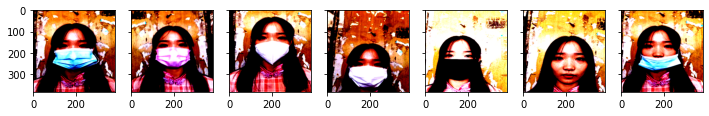

In [29]:
A_transform = A.Compose([
                        A.Resize(512, 512),
                        A.RandomCrop(384, 384),
                        A.HorizontalFlip(p=0.5),
                        A.OneOf([
                            A.MotionBlur(p=1),
                            A.OpticalDistortion(p=1),
                            A.GaussNoise(p=1)                 
                        ], p=1),
                        A.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                    ])
masks = MaskDatset('./input/data/train', transform=A_transform)
mask_plot(masks[500])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


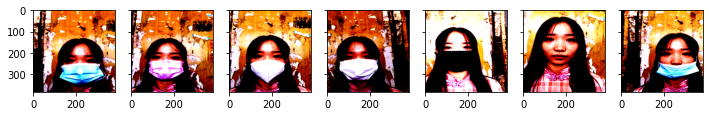

In [30]:
A_transform = A.Compose([
                        A.Resize(512, 512),
                        A.RandomCrop(384, 384),
                        A.HorizontalFlip(p=0.5),
                        A.OneOf([
                            A.MotionBlur(p=1),
                            A.OpticalDistortion(p=1),
                            A.GaussNoise(p=1)                 
                        ], p=1),
                        A.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                    ])
masks = MaskDatset('./input/data/train', transform=A_transform)
mask_plot(masks[500])

In [11]:
import albumentations.augmentations.transforms.Cutout

/opt/conda/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:688: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


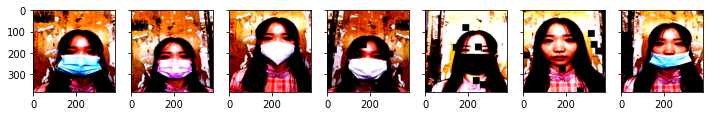

In [15]:
A_transform = A.Compose([
                        A.Resize(512, 512),
                        A.RandomCrop(384, 384),
                        A.HorizontalFlip(p=0.5),
                        A.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                        A.Cutout(num_holes=8, max_h_size=32,max_w_size=32),
                    ])
masks = MaskDatset('./input/data/train', transform=A_transform)
mask_plot(masks[500])

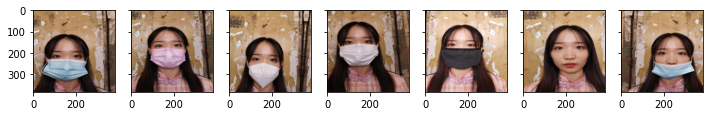

In [20]:
A_transform = A.Compose([
                        A.Resize(512, 512),
                        A.RandomCrop(384, 384),
                        A.HorizontalFlip(p=0.5),
                        # A.Normalize(mean=[0.485, 0.456, 0.406],
                        #             std=[0.229, 0.224, 0.225]),
                        # A.CLAHE(p=0.3),
                        A.ElasticTransform()
                    ])
masks = MaskDatset('./input/data/train', transform=A_transform)
mask_plot(masks[500])